In [1]:
library(GLMsData)
data(flowers)

In [2]:
str(flowers)

'data.frame':	24 obs. of  3 variables:
 $ Flowers: num  62.4 77.1 77.7 75.4 55.7 54.2 68.9 78.2 49.5 62 ...
 $ Light  : int  150 150 150 150 300 300 300 300 450 450 ...
 $ Timing : Factor w/ 2 levels "Before","PFI": 2 2 1 1 2 2 1 1 2 2 ...


In [3]:
lm.1 <- lm(Flowers ~ Light + factor(Timing), data=flowers)

In [4]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),83.39916667,3.289524528,25.352955,3.119823e-17
Light,-0.04049048,0.005157065,-7.851457,1.110707e-07
factor(Timing)PFI,-12.09166667,2.642209684,-4.576346,1.638763e-04


In [5]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Light,1,2582.1789,2582.17889,61.64538,1.110707e-07
factor(Timing),1,877.2504,877.25042,20.94295,1.638763e-04
Residuals,21,879.6403,41.88763,NA,NA


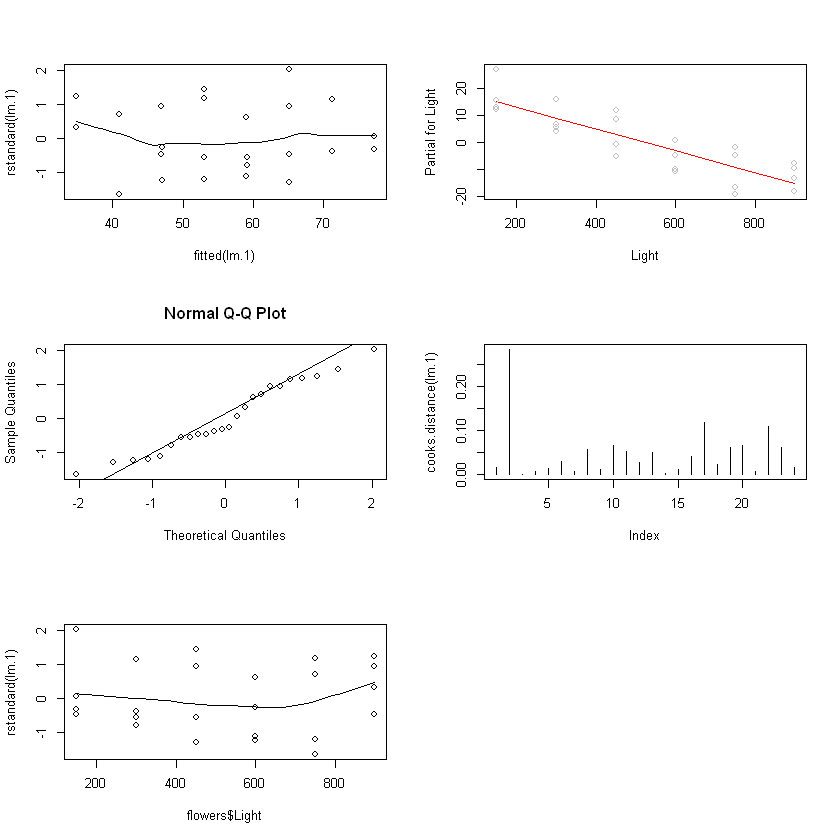

In [13]:
par(mfrow=c(3, 2))

scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms="Light")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))
plot(cooks.distance(lm.1), type="h")
scatter.smooth(rstandard(lm.1) ~ flowers$Light)

In [8]:
cook_thres <- qf(0.5, 2, 21)

In [9]:
greater.thres <- which(cooks.distance(lm.1) > cook_thres)

In [10]:
greater.thres

named integer(0)

In [14]:
influence.measures(lm.1)

Influence measures of
	 lm(formula = Flowers ~ Light + factor(Timing), data = flowers) :

    dfb.1_ dfb.Lght dfb.f.T.   dffit cov.r   cook.d    hat inf
1  -0.1277   0.1552  -0.1060 -0.2158 1.353 0.016116 0.1726    
2   0.5922  -0.7195   0.4915  1.0005 0.734 0.282543 0.1726    
3   0.0280  -0.0204  -0.0139  0.0284 1.398 0.000281 0.1726    
4  -0.1442   0.1051   0.0718 -0.1462 1.378 0.007440 0.1726    
5  -0.0877   0.1066  -0.1213 -0.2020 1.249 0.014064 0.1155    
6  -0.1268   0.1541  -0.1754 -0.2920 1.188 0.028900 0.1155    
7  -0.1254   0.0721   0.0821 -0.1367 1.281 0.006498 0.1155    
8   0.3810  -0.2193  -0.2496  0.4156 1.080 0.056700 0.1155    
9  -0.0294   0.0357  -0.1219 -0.1760 1.208 0.010671 0.0869    
10  0.0763  -0.0927   0.3165  0.4571 0.928 0.065898 0.0869    
11 -0.2927   0.0821   0.2803 -0.4048 0.990 0.052801 0.0869    
12  0.2056  -0.0577  -0.1969  0.2844 1.119 0.027154 0.0869    
13  0.0651  -0.0791  -0.2702 -0.3902 1.006 0.049349 0.0869    
14  0.0139  -0.0169  -0.0579

In [16]:
rowSums(influence.measures(lm.1)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0